# **Tools - NumPy教程**

*NumPy is the fundamental library for scientific computing with Python. NumPy is centered around a powerful N-dimensional array object, and it also contains useful linear algebra, Fourier transform, and random number functions.*

# Creating arrays
First let's make sure that this notebook works both in python 2 and 3:

In [2]:
from __future__ import division, print_function, unicode_literals

Now let's import `numpy`. Most people import it as `np`:

In [1]:
import numpy as np

## `np.zeros`

The `zeros` function creates an array containing any number of zeros:

In [3]:
np.zeros(5) # zeros用于创建全0数组

array([0., 0., 0., 0., 0.])

It's just as easy to create a 2D array (ie. a matrix) by providing a tuple with the desired number of rows and columns. For example, here's a 3x4 matrix:

In [6]:
np.zeros((3,4)) # 3x4全0矩阵

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## Some vocabulary - NumPy中的一些术语

* In NumPy, each dimension维度 is called an **axis轴**.  注意axis是单数，其复数形式就是axes
* The number of axes 轴数 is called the **rank**.
    * For example, the above 3x4 matrix is an array of rank 2 (it is 2-dimensional).
    * The first axis has length 3, the second has length 4.
* An array's list of axis lengths is called the **shape** of the array.
    * For example, the above matrix's shape is `(3, 4)`.
    * The rank is equal to the shape's length.
* The **size** of an array is the total number of elements, which is the product of all axis lengths (eg. 3*4=12)

下面是我对以上术语的翻译，自己的称呼：  
+ **axes(复数axis)**：轴，描述数组的维度
+ **rank**：秩，描述数组的轴数 （秩，就是线代里面的定义）
+ **shape**：规模，描述数组的规格，以tuple类型展示每个轴数
+ **size**：尺寸，描述数组的元素总个数      
注：数组也即矩阵，以后等同理解

In [4]:
a = np.zeros((3,4))
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [5]:
a.shape # 调用shape，查看数组的规格

(3, 4)

In [12]:
a.ndim  # equal to len(a.shape)，记忆的话ndim应该是 the number of dimension，查看轴数，也就rank秩

2

In [7]:
a.size # 查看数组尺寸，即元素总个数，这里的元素是最小单位，即float/int数

12

## N-dimensional arrays
You can also create an N-dimensional array of arbitrary rank. For example, here's a 3D array (rank=3), with shape `(2,3,4)`:

In [8]:
np.zeros((2,3,4)) # 从左到右，依次是数组 从外至内 的元素个数（这里的元素不是最小单位，比如每个list也算一个元素）

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

## Array type
NumPy arrays have the type `ndarray`s:      
一般由numpy生成的数组，其类型是 ndarray，也是numpy的核心类型

In [9]:
type(np.zeros((3,4)))

numpy.ndarray

## `np.ones`
Many other NumPy functions create `ndarrays`.

Here's a 3x4 matrix full of ones:

In [10]:
np.ones((3,4)) # 同理于zeros，ones创建全1数组

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

## `np.full`
Creates an array of the given shape initialized with the given value. Here's a 3x4 matrix full of `π`.

In [11]:
np.full((3,4), np.pi) # np.full((row,col),num) 创建全是num值的row x col 的数组

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265]])

## `np.empty`
An uninitialized 2x3 array (its content is not predictable, as it is whatever is in memory at that point):

In [22]:
np.empty((2,3)) # 创建未初始化的空数组，里面的值完全随机取决于内存中现有的值

array([[0.        , 0.33333333, 0.66666667],
       [1.        , 1.33333333, 1.66666667]])

## np.array
Of course you can initialize an `ndarray` using a regular python array. Just call the `array` function:

In [13]:
np.array([[1,2,3,4], [10, 20, 30, 40]]) # 可以使用list来初始化创建一个数组

array([[ 1,  2,  3,  4],
       [10, 20, 30, 40]])

## `np.arange`
You can create an `ndarray` using NumPy's `range` function, which is similar to python's built-in `range` function:

创建一个有序数组，类似python自带的range

In [15]:
np.arange(1, 5) # 注意，和python自带的range一样，左闭右开区间

array([1, 2, 3, 4])

It also works with floats:

In [14]:
np.arange(1.0, 5.0)

array([1., 2., 3., 4.])

Of course you can provide a step parameter:

In [16]:
np.arange(1, 5, 0.5) # 可以传入第三个参数，控制步长

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

However, when dealing with floats, the exact number of elements in the array is not always predictible. For example, consider this:     

！需要特别注意的一点：当涉及到浮点数时，浮点数精度会导致计算结果可能会有差异，由此，一般用linspace来代替arange

In [18]:
print(np.arange(0, 5/3, 1/3)) # depending on floating point errors, the max value is 4/3 or 5/3.
print(np.arange(0, 5/3, 0.333333333))
print(np.arange(0, 5/3, 0.333333334))


[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[0.         0.33333333 0.66666667 1.         1.33333334]


## `np.linspace`
For this reason, it is generally preferable to use the `linspace` function instead of `arange` when working with floats. The `linspace` function returns an array containing a specific number of points evenly distributed between two values (note that the maximum value is *included*, contrary to `arange`):

当涉及浮点数创建时，arange会出现精度问题，导致不是均分区间，而linspace确保了区间被平均划分      
另外，注意参数的区别：
+ arange(起始值，终值，步长) [start,end)左闭右开
+ linspace(起始值，终值，划分总数) 没有区间的开闭之说，完全取决于划分总数  -- 见下下个cell

In [17]:
print(np.linspace(0, 5/3, 6))

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]


In [19]:
print(np.arange(1,9,3)) # 本质上是 1 2 3 4 5 6 7 8，从1开始每次加3，直至超过8
print(np.linspace(1,9,3)) # 本质上是将 [1,9] 划成3个等长区间，返回三个区间的终始值

[1 4 7]
[1. 5. 9.]


## `np.rand` and `np.randn` -- Numpy自带的随机函数
A number of functions are available in NumPy's `random` module to create `ndarray`s initialized with random values.
For example, here is a 3x4 matrix initialized with random floats between 0 and 1 (uniform distribution):

In [20]:
np.random.rand(3,4)  # 创建 3x4大小的数组，元素初始化为 [0,1) 中的随机数， 服从均匀分布(uniform distribution)， 区间范围不可调

array([[0.23236617, 0.42438672, 0.75830652, 0.21936652],
       [0.80183395, 0.55448307, 0.6149603 , 0.46629961],
       [0.40988974, 0.35468596, 0.25683572, 0.9868193 ]])

Here's a 3x4 matrix containing random floats sampled from a univariate [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) (Gaussian distribution) of mean 0 and variance 1:

In [21]:
np.random.randn(3,4) # 创建 3x4大小的数组，元素初始化为随机数，该随机数服从正态分布normal distribution，区间范围不可调

array([[ 0.36101671,  0.25540098,  0.23982584, -0.02848005],
       [ 1.34786278, -1.32066998, -0.94457083,  1.77044953],
       [ 0.66465793,  0.2738004 ,  1.8944283 , -1.7022655 ]])

To give you a feel of what these distributions look like, let's use matplotlib (see the [matplotlib tutorial](tools_matplotlib.ipynb) for more details):

以下是为了帮助理解这两个分布，作图展示辅助理解（不是做两个分布的原始图，而是利用rand和randn作图，因此每次跑的结果图不一样）

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

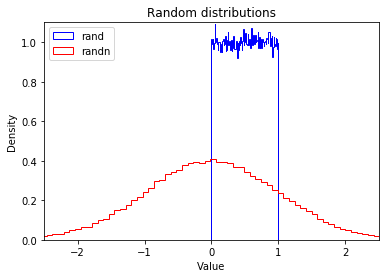

In [25]:
plt.hist(np.random.rand(100000), normed=True, bins=100, histtype="step", color="blue", label="rand")
plt.hist(np.random.randn(100000), normed=True, bins=100, histtype="step", color="red", label="randn")
plt.axis([-2.5, 2.5, 0, 1.1])
plt.legend(loc = "upper left")
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

## np.fromfunction - 利用函数规则创建数组
You can also initialize an `ndarray` using a function:

In [24]:
def my_function(z, y, x):
    return x * y + z

np.fromfunction(my_function, (3, 2, 10))

array([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]],

       [[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]],

       [[ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]]])

NumPy first creates three `ndarrays` (one per dimension), each of shape `(3, 2, 10)`. Each array has values equal to the coordinate along a specific axis. For example, all elements in the `z` array are equal to their z-coordinate:

    [[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
      [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
    
     [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
      [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
    
     [[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
      [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]]]

So the terms x, y and z in the expression `x * y + z` above are in fact `ndarray`s (we will discuss arithmetic operations on arrays below).  **The point** is that the function `my_function` is only called *once*, instead of once per element. This makes initialization very efficient.

使用fromfunction(fucName,(z,y,x,...))创建数组时，先构建第二个参数格式的数组，然后数组中的每个最小元素是其沿特定轴的坐标（见下一个cell），然后调用funcName计算，最后填入计算值, 注意zyx排列顺序，最外层z ——> 最内层x

In [26]:
def showCoordX(z,y,x): # 注意zyx排列顺序，最外层z ——> 最内层x
    return x
def showCoordY(z,y,x):
    return y
def showCoordZ(z,y,x):
    return z
bar = '----------------------------------------'
print(np.fromfunction(showCoordX,(3,2,5)))
print(bar)
print(np.fromfunction(showCoordY,(3,2,5)))
print(bar)
print(np.fromfunction(showCoordZ,(3,2,5)))


[[[0. 1. 2. 3. 4.]
  [0. 1. 2. 3. 4.]]

 [[0. 1. 2. 3. 4.]
  [0. 1. 2. 3. 4.]]

 [[0. 1. 2. 3. 4.]
  [0. 1. 2. 3. 4.]]]
----------------------------------------
[[[0. 0. 0. 0. 0.]
  [1. 1. 1. 1. 1.]]

 [[0. 0. 0. 0. 0.]
  [1. 1. 1. 1. 1.]]

 [[0. 0. 0. 0. 0.]
  [1. 1. 1. 1. 1.]]]
----------------------------------------
[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]

 [[2. 2. 2. 2. 2.]
  [2. 2. 2. 2. 2.]]]


# Array data
## `dtype`
NumPy's `ndarray`s are also efficient in part because all their elements must have the same type (usually numbers).
You can check what the data type is by looking at the `dtype` attribute:

使用属性dtype查看数组类型

In [27]:
c = np.arange(1, 5)
print(c)
print(c.dtype)

[1 2 3 4]
int64


In [28]:
c = np.arange(1.0, 5.0)
print(c)
print(c.dtype,)

[1. 2. 3. 4.]
float64


Instead of letting NumPy guess what data type to use, you can set it explicitly when creating an array by setting the `dtype` parameter:

一般，NumPy会自动识别并匹配类型，但是建议在创建数组的时候显示指定类型

In [30]:
d = np.arange(1, 5, dtype=np.complex64)
print(d)
print(d.dtype)

[1.+0.j 2.+0.j 3.+0.j 4.+0.j]
complex64


Available data types include `int8`, `int16`, `int32`, `int64`, `uint8`|`16`|`32`|`64`, `float16`|`32`|`64` and `complex64`|`128`. Check out [the documentation](http://docs.scipy.org/doc/numpy-1.10.1/user/basics.types.html) for the full list.

## `itemsize`
The `itemsize` attribute returns the size (in bytes) of each item:

返回的是每个元素的内存大小，单位是字节 bytes

In [29]:
e = np.arange(1, 5, dtype=np.complex64)
print(e.itemsize)
ee = np.arange(1,5,dtype=np.int32)
print(ee.itemsize)
eee = np.linspace(1,5,dtype=np.float128)
print(eee.itemsize)

8
4
16


## `data` buffer  -- 数据缓存区（基本用不到，比较偏底层，不用特别了解）
An array's data is actually stored in memory as a flat (one dimensional) byte buffer. It is available *via* the `data` attribute (you will rarely need it, though).

调用data属性，返回数据所在缓冲区地址

In [31]:
f = np.array([[1,2],[1000, 2000]], dtype=np.int32)
f.data

In python 2, `f.data` is a buffer. In python 3, it is a memoryview.

关于python的memoryview https://www.runoob.com/python/python-func-memoryview.html

In [32]:
if (hasattr(f.data, "tobytes")):
    data_bytes = f.data.tobytes() # python 3
else:
    data_bytes = memoryview(f.data).tobytes() # python 2

data_bytes

b'\x01\x00\x00\x00\x02\x00\x00\x00\xe8\x03\x00\x00\xd0\x07\x00\x00'

Several `ndarrays` can share the same data buffer, meaning that modifying one will also modify the others. We will see an example in a minute.

要注意的一点是，有些ndarrays对象共用一个缓冲区，即改变一个的值可能会影响其他的

# Reshaping an array (数组/矩阵 规格调整)
## In place
Changing the shape of an `ndarray` is as simple as setting its `shape` attribute. However, the array's size must remain the same.

可以直接调用shape属性更改数组shape（规模），但是要注意的一点是，整个数组的size（尺寸）必须保持不变

In [33]:
g = np.arange(24)
print(g)
print("Rank:", g.ndim)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Rank: 1


In [34]:
g.shape = (6, 4) # 6x4 = 24，数组的尺寸保持不变，尺寸变了会报错
print(g)
print("Rank:", g.ndim)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
Rank: 2


In [36]:
g.shape = (2, 3, 4) # 2x3x4 = 24，数组的尺寸保持不变
print(g)
print("Rank:", g.ndim)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
Rank: 3


## `reshape`
The `reshape` function returns a new `ndarray` object pointing at the *same* data. This means that modifying one array will also modify the other.

调用reshape会将改完shape的数组返回到新的数组，但是原数组shape不变;   
### 这里有一点要尤其注意，reshape生成的新数组，其实内存上是共用原数组的，因此，改变这个新数组也会同时改变原数组，改变原数组同理

In [35]:
g2 = g.reshape(4,6)
print(g2)
print("Rank:", g2.ndim)
print(bar)
print(g)
print("g rank:",g.ndim)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
Rank: 2
----------------------------------------
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
g rank: 2


Set item at row 1, col 2 to 999 (more about indexing below).

In [37]:
g2[1, 2] = 999
g2

array([[  0,   1,   2,   3,   4,   5],
       [  6,   7, 999,   9,  10,  11],
       [ 12,  13,  14,  15,  16,  17],
       [ 18,  19,  20,  21,  22,  23]])

The corresponding element in `g` has been modified.

In [38]:
g

array([[[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [999,   9,  10,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]]])

## `ravel`
Finally, the `ravel` function returns a new one-dimensional `ndarray` that also points to the same data:

调用ravel生成一个新的一维数组，注意，同样的，该数组其实也是共享原数组内存的

In [39]:
g.ravel()

array([  0,   1,   2,   3,   4,   5,   6,   7, 999,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23])

# Arithmetic operations --- NumPy数组的 算术运算
All the usual arithmetic operators (`+`, `-`, `*`, `/`, `//`, `**`, etc.) can be used with `ndarray`s. They apply *elementwise*: 

一句话，NumPy数组支持所有基本的算术运算，并且是整体对每个对应位置元素的运算     
### 注意不是完全的矩阵运算！！！ 乘除法不是矩阵乘除，而是简单的对应位置相乘除
### 再次强调，其实所有的数组运算，仅仅是单纯的每个对应位置元素的运算
### 由上可知，参与运算的数组其shape必须一致，否则会进行broadcast操作，见下一大标题
## 但是当最内层元素个数不一样多时候，运算会直接报错，见下下个cell

In [41]:
a = np.array([14, 23, 32, 41])
b = np.array([5,  4,  3,  2])
print("a + b  =", a + b)
print("a - b  =", a - b)
print("a * b  =", a * b)
print("a / b  =", a / b)
print("a // b  =", a // b)
print("a % b  =", a % b)
print("a ** b =", a ** b)

a + b  = [19 27 35 43]
a - b  = [ 9 19 29 39]
a * b  = [70 92 96 82]
a / b  = [ 2.8         5.75       10.66666667 20.5       ]
a // b  = [ 2  5 10 20]
a % b  = [4 3 2 1]
a ** b = [537824 279841  32768   1681]


Note that the multiplication is *not* a matrix multiplication. We will discuss matrix operations below.

The arrays must have the same shape. If they do not, NumPy will apply the *broadcasting rules*.

### 当最内层元素个数不一样多时候，运算会直接报错当最内层元素个数不一样多时候，运算会直接报错

In [40]:
try:
    a = np.arange(1,5)
    b = np.arange(10,60,10)
    print('a:\n',a)
    print('b:\n',b)
    print(a+b) # 错误示例，不符合规则
except ValueError as err:
    print(err)

a:
 [1 2 3 4]
b:
 [10 20 30 40 50]
operands could not be broadcast together with shapes (4,) (5,) 


In [42]:
a = np.array(
    [
        [1,2,3],
        [4,5,6]
    ]
)
b = np.array(
    [
        [10,10],
        [20,20]
    ]
)
print('a:\n',a)
print('b:\n',b)
try:
    print(a+b) # 错误示例，不符合规则
except ValueError as err:
    print(err)

a:
 [[1 2 3]
 [4 5 6]]
b:
 [[10 10]
 [20 20]]
operands could not be broadcast together with shapes (2,3) (2,2) 


# Broadcasting  --- 当参与运算的数组shape不一样时，自动响应

In general, when NumPy expects arrays of the same shape but finds that this is not the case, it applies the so-called *broadcasting* rules:

## First rule
*If the arrays do not have the same rank, then a 1 will be prepended to the smaller ranking arrays until their ranks match.*

## 规则1: 当数组不具有相同的秩时，则提升秩小的数组的秩（就是不断外套[]），直到它们的秩匹配为止

In [ ]:
h = np.arange(5).reshape(1, 1, 5)
h

Now let's try to add a 1D array of shape `(5,)` to this 3D array of shape `(1,1,5)`. Applying the first rule of broadcasting!

In [43]:
h + [10, 20, 30, 40, 50]  # same as: h + [[[10, 20, 30, 40, 50]]] 后面秩小的数组被外套[]直至秩一样大

NameError: name 'h' is not defined

## Second rule
*Arrays with a 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension. The value of the array element is repeated along that dimension.*
## 规则2:轴数（秩）相同的情况下，每个轴元素数量不一样时(轴数小的数组，最内层必须只能有一个元素)，数量少的数组在该轴重复唯独的那个元素直至数量一样多
## 注意：轴数小的数组，最内层必须只能有一个元素；看 错误示例

In [ ]:
a = np.array(
    [
        [0,1,2],
        [3,4,5]
    ]
)
b = np.array(
    [
        [100],
        [200]
    ]
)
print(a.ndim)
print(b.ndim)

In [ ]:
k = np.arange(6).reshape(2, 3)
k

Let's try to add a 2D array of shape `(2,1)` to this 2D `ndarray` of shape `(2, 3)`. NumPy will apply the second rule of broadcasting:

In [ ]:
k + [[100], [200]]  # same as: k + [[100, 100, 100], [200, 200, 200]]

In [ ]:
try:
    k + [ [100,200], [1000,2000] ] # 错误示例，不符合规则
except ValueError as err:
    print(err)

Combining rules 1 & 2, we can do this:

### 当然，可以结合使用规则1、2

In [ ]:
k + [100, 200, 300]  # after rule 1: [[100, 200, 300]], and after rule 2: [[100, 200, 300], [100, 200, 300]]

And also, very simply:
### 甚至于，在规则1、2的作用下，数组可以和单一数组运算：

In [ ]:
k + 1000  # same as: k + [[1000, 1000, 1000], [1000, 1000, 1000]]

## Third rule
*After rules 1 & 2, the sizes of all arrays must match.*
## 规则三：在规则1、2作用完后，所有参与运算的数组的尺寸必定相同

In [ ]:
try:
    print(k)
    k + [33, 44] # 错误示例
except ValueError as e:
    print(e)

Broadcasting rules are used in many NumPy operations, not just arithmetic operations, as we will see below.
For more details about broadcasting, check out [the documentation](https://docs.scipy.org/doc/numpy-dev/user/basics.broadcasting.html).

## Upcasting -- 向上类型转换
When trying to combine arrays with different `dtype`s, NumPy will *upcast* to a type capable of handling all possible values (regardless of what the *actual* values are).

### 当遇到参与运算的数组内元素类型不一致时，NumPy会自动对类型进行向上转换，是得其能够进行运算操作，至于怎么向上转换的，往内存上所占空间去想就好，空间小的类型向上转换成空间大的类型

In [ ]:
k1 = np.arange(0, 5, dtype=np.uint8)
print(k1)
print(k1.dtype)

In [ ]:
k2 = k1 + np.array([5, 6, 7, 8, 9], dtype=np.int8)
print(k2)
print(k2.dtype)

Note that `int16` is required to represent all *possible* `int8` and `uint8` values (from -128 to 255), even though in this case a uint8 would have sufficed.

In [ ]:
k3 = k1 + 1.5 # uint8 + float64(默认浮点类型)
import sys
# print(type(1.5), sys.getsizeof(1.5))
# print(sys.getsizeof(k3))
print(k3)
print(k3.dtype)

# Conditional operators  --- 条件运算符

The conditional operators also apply elementwise:

条件运算符，也是对每个对应位置的元素进行比较，然后记录下每个位置的真假值

In [ ]:
m = np.array([20, -5, 30, 40])
m < [15, 16, 35, 36]

And using broadcasting:

同样，之前的三条bradcasting规则同样适用

In [ ]:
m < 25  # equivalent to m < [25, 25, 25, 25]

This is most useful in conjunction with boolean indexing (discussed below).
## 注意，以下这种用法非常骚，很常用：

In [ ]:
print(m)
print(m[m < 25]) # 筛选出m数组中小于25的元素，返回一个新数组

# Mathematical and statistical functions -- 数学与统计学函数

Many mathematical and statistical functions are available for `ndarray`s.

## `ndarray` methods
Some functions are simply `ndarray` methods, for example:

In [ ]:
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
print(a)
print("mean =", a.mean()) # 调用mean计算整个数组的平均数

Note that this computes the mean of all elements in the `ndarray`, regardless of its shape.

Here are a few more useful `ndarray` methods:

### 下面的骚操作，用for执行多个函数：

In [ ]:
for func in (a.min, a.max, a.sum, a.prod, a.std, a.var):
    print(func.__name__, "=", func())

+ prod, 乘积（product），返回给定轴上的数组元素的乘积,默认情况下，计算数组中所有元素的乘积 参见：https://blog.csdn.net/qq_34690929/article/details/80061011
+ std, 标准差（standard deviation），计算沿指定轴的标准偏差，默认情况计算整个数组的标准差，计算公式: 
$$ s_{N}=\sqrt{\frac{1}{N} \sum_{i=1}^{N}\left(x_{i}-\bar{x}\right)^{2}}$$
+ var, 方差（variance），计算沿指定轴的方差，默认情况计算整个数组的方差，计算公式: 
$$ s_{N}^{2}=\frac{1}{N} \sum_{i=1}^{N}\left(x_{i}-\bar{x}\right)^{2}$$

参见：https://www.cnblogs.com/quietwalk/p/8243536.html


In [ ]:
b = np.array(
    [
        [1,2,3],
        [4,5,6]
    ]
)
print(b.prod(),'=', np.prod(b),' = 1x2x3x4x5x6 = {}'.format(2*3*4*5*6)) 
# 可以调用属性的方法使用prod，也可以直接调用函数，其他数学函数也是同理，可以查阅dash中的numpy文档
print(b.prod(axis=0), '=', np.prod(b,axis=0), ' = [ 1x4, 2x5, 3x6 ]') # 可以指定轴计算乘积
print(b.prod(axis=1), '=', np.prod(b,axis=1) ,' = [ 1x2x3, 4x5x6 ]')


These functions accept an optional argument `axis` which lets you ask for the operation to be performed on elements along the given axis. For example:

[numpy数组轴详解](https://blog.csdn.net/weixin_40900921/article/details/90734020) -- 感觉讲的不好，看我自己的解释，用向量来解释：  
![numpy数组轴详解-RG](./images/RGNotes/关于numpy轴的运算.jpg "numpy数组轴详解-RG") 


In [ ]:
c=np.arange(24).reshape(4,3,2)
c

In [ ]:
c.sum()

In [ ]:
print(c.sum(axis=0))  # sum across matrices
print(bar)
print( # 计算方法
    [
    [0+6+12+18, 1+7+13+19], # 对应位置
    [2+8+14+20, 3+9+15+21],
    [4+10+16+22, 5+11+17+23]
])

In [ ]:
print(c.sum(axis=1))  # sum across rows
print(bar)
print(
    [
        [0+2+4, 1+3+5],
        [6+8+10, 7+9+11],
        [12+14+16, 13+15+17],
        [18+20+22, 19+21+23]
    ]
)

In [ ]:
print(c.sum(2)) # 等价于 c.sum(axis=2)
print(bar)
print(
    [
        [0+1, 2+3, 4+5],
        [6+7, 8+9, 10+11],
        [12+13, 14+15, 16+17],
        [18+19, 20+21, 22+23]
    ]
)

You can also sum over multiple axes:  

# 这个多轴计算，我有点难理解

In [ ]:
c.sum(axis=(0,2))  # sum across matrices and columns ---- 这个我还是不是很理解

In [ ]:
0+1+2+3 + 12+13+14+15, 4+5+6+7 + 16+17+18+19, 8+9+10+11 + 20+21+22+23

## Universal functions -- 通用函数（一些矩阵/向量运算函数）
NumPy also provides fast elementwise functions called *universal functions*, or **ufunc**. They are vectorized wrappers of simple functions. For example `square` returns a new `ndarray` which is a copy of the original `ndarray` except that each element is squared:

In [ ]:
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
np.square(a) # 将数组中每个元素依次平方

Here are a few more useful unary ufuncs:
+ abs: 返回每个元素的绝对值
+ sqrt: 返回每个元素的平方根
+ exp: 计算每个元素的指数（以自然常数e为底），$e^{x_i}$ 【如果要使用别的底数，可以查阅dash中的文档，如np.exp2() <=> $2^{x_i}$ 等
+ log: 计算每个元素的对数（以10为底），$log_{10}x_i$ 【如果要使用别的底数，可以查阅dash中的文档，如np.log2()、log10 等
+ sign: 计算sign函数，就是如下函数:
$$
y=\operatorname{sign}(x)=\left\{\begin{array}{cl}
1, & x>0 \\
0, & x=0 \\
-1, & x<0
\end{array}\right.
$$
+ ceil: 计算每个元素的上限(向上取整，返回比x大的最小整数)，数学表达式: $\lceil x\rceil$，例如：$\lceil 3.2\rceil = 4$
+ modef: 按元素顺序返回其小数部分和整数部分的两个数组，第一个数组是每个元素的小数部分，第二个数组是每个元素的整数部分
+ isnan: 依次判断每个元素是不是nan（空值），返回True/False
+ cos: 计算 $\cos x_i$

**此处只展示了部分函数，其实还有很多，建议需要用时再查阅**

In [ ]:
print("Original ndarray")
print(a)
for func in (np.abs, np.sqrt, np.exp, np.log, np.sign, np.ceil, np.modf, np.isnan, np.cos):
    print(bar)
    print("\n", func.__name__)
    print(func(a))

## Binary ufuncs -- 二元运算函数（即需要两个数组参与运算，shape不一致时Broadcastin规则响应）
There are also many binary ufuncs, that apply elementwise on two `ndarray`s.  Broadcasting rules are applied if the arrays do not have the same shape:

In [ ]:
a = np.array([1, -2, 3, 4])
b = np.array([2, 8, -1, 7])
np.add(a, b)  # equivalent to a + b

In [ ]:
np.greater(a, b)  # equivalent to a > b

In [ ]:
np.maximum(a, b)

In [ ]:
np.copysign(a, b) # 将a数组中所有元素的符号（正负号）依次改成b中对应元素的符号

# Array indexing -- 数组索引（用下标访问各个元素）
## One-dimensional arrays  -- 一维度数组，用法同python原生
One-dimensional NumPy arrays can be accessed more or less like regular python arrays:

In [ ]:
a = np.array([1, 5, 3, 19, 13, 7, 3])
a[3]

In [ ]:
a[2:5]

In [ ]:
a[2:-1]

In [ ]:
a[:2]

In [ ]:
a[2::2]

In [ ]:
a[::-1]

Of course, you can modify elements:

In [ ]:
a[3]=999
a

You can also modify an `ndarray` slice:

In [ ]:
a[2:5] = [997, 998, 999]
a

## Differences with regular python arrays
Contrary to regular python arrays, if you assign a single value to an `ndarray` slice, it is copied across the whole slice, thanks to broadcasting rules discussed above.

和原生python不一样的一点是，用单一值赋值给切片时，会将切片的所有元素变成该单一值, 而原生python会报错

In [ ]:
a[2:5] = -1
print(a)
b = [11, 22, 33, 44, 55, 66, 77]
try:
    b[2:5] = 0
    print(b)
except TypeError as err:
    print(err)

Also, you cannot grow or shrink `ndarray`s this way:

In [ ]:
try:
    a[2:5] = [1,2,3,4,5,6]  # too long
except ValueError as e:
    print(e)

You cannot delete elements either:

In [ ]:
try:
    del a[2:5]
except ValueError as e:
    print(e)

Last but not least, `ndarray` **slices are actually *views*** on the same data buffer. This means that if you create a slice and modify it, you are actually going to modify the original `ndarray` as well!

### 注意：对数组的切片操作，实际上是直接在内存上更改原数组内容，因此对切片的改动，会导致原数组内容连同改动，同样，改动原数组也会连同改变切片

In [ ]:
print('原数组：', a)
a_slice = a[2:6]
print('切片：',a_slice)
print(bar)
a_slice[1] = 1000
print("改动切片值后的切片：",a_slice)
print("改动切片值后的数组：",a)  # the original array was modified!

In [ ]:
print("原数组：",a)
print("原切片：",a_slice)
print(bar)
a[3] = 2000
print("改动原数组后的数组：",a)
print("改动原数组后的切片：",a_slice)  # similarly, modifying the original array modifies the slice!

If you want a copy of the data, you need to use the `copy` method:

如果仅仅是想要使用数组的备份（拷贝），而不希望在使用时对原数组造成影响，则在切片时使用copy()方法

In [ ]:
print("原数组：",a)
another_slice = a[2:6].copy()
print("新切片：",another_slice)
print(bar)
another_slice[1] = 3000
print("改动新切片后的切片:",another_slice)
print("改动新切片后的数组:",a)  # the original array is untouched

In [ ]:
print("原数组：",a)
print("原新切片：",another_slice)
print(bar)
a[3] = 4000
print("改动原数组后的数组：",a)
print("改动原数组后的切片：", another_slice)  # similary, modifying the original array does not affect the slice copy

## Multi-dimensional arrays
Multi-dimensional arrays can be accessed in a similar way by providing an index or slice for each axis, separated by commas:

多维数组访问元素可以用,间隔，如 `a[i,j]`, 也可以 `a[i][j]`，但是建议用前一种，较为简洁

In [ ]:
b = np.arange(48).reshape(4, 12)
b

In [ ]:
# row 1, col 2
print(b[1, 2]) # 建议用这种
print(bar)
print(b[1][2]) 

In [ ]:
# row 1, all columns
print(b[1, :])
print(bar)
print(b[1]) # 建议用这种

In [ ]:
# all rows, column 1
print(b[:, 1]) # 这个貌似只能用这种方法，否则就得用for

**Caution**: note the subtle difference between these two expressions: 

### 注意： `a[i, :]` 和 `a[i:j, :]` 的细微区别

In [ ]:
print(b)

In [ ]:
print(b[1, :]) # 返回 row 1 的一个 1D数组，shape是 (12,)

In [ ]:
print(b[1:2, :]) # 返回 row1 的一个 2D
print(bar)
print(b[0:2, :]) # 其实就是切片，只不过是列表为元素的切片，每个row是一个元素，这样子看就好了

The first expression returns row 1 as a 1D array of shape `(12,)`, while the second returns that same row as a 2D array of shape `(1, 12)`.

## Fancy indexing -- 更加灵活花哨的索引方式
You may also specify a list of indices that you are interested in. This is referred to as *fancy indexing*.

In [ ]:
print(b)

In [ ]:
b[(0,2), 2:5]  # rows 0 and 2, columns 2 to 4 (5-1)  前面控制行的筛选(用,分隔)/切片(用:分隔), 后面控制列的筛选或切片； 单独的 : 表示整行/列

In [ ]:
b[:, (-1, 2, -1)]  # all rows, columns -1 (last), 2 and -1 (again, and in this order) 
# 这里的意思是，筛选出每一行的 最后一个元素，第3个元素（2表示第3个），在筛选一次最后一个元素

If you provide multiple index arrays, you get a 1D `ndarray` containing the values of the elements at the specified coordinates.

In [ ]:
b[(-1, 2, -1, 2), (5, 9, 1, 9)]  # returns a 1D array with b[-1, 5], b[2, 9], b[-1, 1] and b[2, 9] (again) 这里就是等价于坐标筛选了

## Higher dimensions -- 更高维（比较少用）
Everything works just as well with higher dimensional arrays, but it's useful to look at a few examples:

In [ ]:
c = b.reshape(4,2,6)
c

In [ ]:
c[2, 1, 4]  # matrix 2, row 1, col 4

In [ ]:
c[2, :, 3]  # matrix 2, all rows, col 3

If you omit coordinates for some axes, then all elements in these axes are returned:

In [ ]:
c[2, 1]  # Return matrix 2, row 1, all columns.  This is equivalent to c[2, 1, :]

## Ellipsis (`...`) -- 省略号在索引中的作用，就是简写后续所有轴
You may also write an ellipsis (`...`) to ask that all non-specified axes be entirely included.

In [ ]:
c[2, ...]  #  matrix 2, all rows, all columns.  This is equivalent to c[2, :, :]

In [ ]:
c[2, 1, ...]  # matrix 2, row 1, all columns.  This is equivalent to c[2, 1, :]

In [ ]:
c[2, ..., 3]  # matrix 2, all rows, column 3.  This is equivalent to c[2, :, 3]

In [ ]:
c[..., 3]  # all matrices, all rows, column 3.  This is equivalent to c[:, :, 3]

## Boolean indexing  -- 也可以用真假值来控制索引, 为真的位置被筛选出来, 但是每个位置要有真假值，不可缺失（报错见try部分）
You can also provide an `ndarray` of boolean values on one axis to specify the indices that you want to access.

In [ ]:
b = np.arange(48).reshape(4, 12)
print(b)

In [ ]:
rows_on = np.array([True, False, True, False])
print(rows_on)
print(bar)
print(b[rows_on, :])  # Rows 0 and 2, all columns. Equivalent to b[(0, 2), :]
print(bar)
rows_lack = [True, False, True] # b有4行，这里筛选只有3个真假值，缺失一个
try:
    print(b[rows_lack, :]) # 会报IndexError的错
except IndexError as err:
    print(err)

In [ ]:
print(b)
cols_on = np.array([False, True, False] * 4)
print([False, True, False] * 4)
print(bar)
print(cols_on)
print(bar)
print(b[:, cols_on])  # All rows, columns 1, 4, 7 and 10
print(bar)
try:
    cols_lack = [False, True, False]*3 + [True, True] # b有12列，这里缺失一个真假值
    print(b[:, cols_lack])
except IndexError as err:
    print(err)

## `np.ix_`   -- 多维数组用真假值索引，要用这个（暂时没看这一块内容）
You cannot use boolean indexing this way on multiple axes, but you can work around this by using the `ix_` function:

In [ ]:
b[np.ix_(rows_on, cols_on)]

In [ ]:
np.ix_(rows_on, cols_on)

If you use a boolean array that has the same shape as the `ndarray`, then you get in return a 1D array containing all the values that have `True` at their coordinate. This is generally used along with conditional operators:

In [ ]:
b[b % 3 == 1]

# Iterating  -- 迭代（就是for）
Iterating over `ndarray`s is very similar to iterating over regular python arrays. Note that iterating over multidimensional arrays is done with respect to the first axis.

In [ ]:
c = np.arange(24).reshape(2, 3, 4)  # A 3D array (composed of two 3x4 matrices)
c

In [ ]:
for m in c:
    print("Item:")
    print(m)

In [ ]:
for i in range(len(c)):  # Note that len(c) == c.shape[0]
    print("Item:")
    print(c[i])

If you want to iterate on *all* elements in the `ndarray`, simply iterate over the `flat` attribute:
### 对于多维数组，如果想迭代每一个最小元素（我称之为原子元素），可以使用数组对象的`flat`属性,`np.flat`

In [ ]:
for i in c.flat:
    print("Item:", i)
print(bar) # 等价于最蠢的for
for i in range(c.shape[0]):
    for j in range(c.shape[1]):
        for k in range(c.shape[2]):
            print("iterm:", c[i,j,k])

# Stacking arrays  -- 堆叠数组
It is often useful to stack together different arrays. NumPy offers several functions to do just that. Let's start by creating a few arrays.

In [ ]:
q1 = np.full((3,4), 1.0)
q1

In [ ]:
q2 = np.full((4,4), 2.0)
q2

In [ ]:
q3 = np.full((3,4), 3.0)
q3

## `vstack`  -- 垂直堆叠（堆叠最大的列表元素，比如行）
Now let's stack them vertically using `vstack`:

In [ ]:
q4 = np.vstack((q1, q2, q3))
q4

In [ ]:
q4.shape

This was possible because q1, q2 and q3 all have the same shape (except for the vertical axis, but that's ok since we are stacking on that axis).

## `hstack` -- 水平堆叠（直接看效果吧）
We can also stack arrays horizontally using `hstack`:

In [ ]:
q5 = np.hstack((q1, q3))
q5

In [ ]:
q5.shape

This is possible because q1 and q3 both have 3 rows. But since q2 has 4 rows, it cannot be stacked horizontally with q1 and q3:

In [ ]:
try:
    q5 = np.hstack((q1, q2, q3))
except ValueError as e:
    print(e)

## `concatenate` -- 指定轴堆叠，其实hstack、vstack都是其特例
The `concatenate` function stacks arrays along any given existing axis.

In [ ]:
q7 = np.concatenate((q1, q2, q3), axis=0)  # Equivalent to vstack
q7

In [ ]:
q7.shape

As you might guess, `hstack` is equivalent to calling `concatenate` with `axis=1`.

## `stack` -- 直接堆叠两个数组
The `stack` function stacks arrays along a new axis. All arrays have to have the same shape.

In [ ]:
q8 = np.stack((q1, q3))
q8

In [ ]:
q8.shape

# Splitting arrays  -- 分割数组（堆叠的反操作）
Splitting is the opposite of stacking. For example, let's use the `vsplit` function to split a matrix vertically.

First let's create a 6x4 matrix:

In [ ]:
r = np.arange(24).reshape(6,4)
r

Now let's split it in three equal parts, vertically:

In [ ]:
r1, r2, r3 = np.vsplit(r, 3) # 就是简单的拆分成3个部分
r1

In [ ]:
r2

In [ ]:
r3

There is also a `split` function which splits an array along any given axis. Calling `vsplit` is equivalent to calling `split` with `axis=0`. There is also an `hsplit` function, equivalent to calling `split` with `axis=1`:

同理于vstack的hstack、stack可以指定轴，一样有hsplit、split

In [ ]:
r4, r5 = np.hsplit(r, 2)
r4

In [ ]:
r5

# Transposing arrays  -- 数组元素顺序调整（轴的交换，有点复杂，我感觉不怎么用的上）
The `transpose` method creates a new view on an `ndarray`'s data, with axes permuted in the given order.

For example, let's create a 3D array:

In [ ]:
t = np.arange(24).reshape(4,2,3)
t

Now let's create an `ndarray` such that the axes `0, 1, 2` (depth, height, width) are re-ordered to `1, 2, 0` (depth→width, height→depth, width→height):

In [ ]:
t1 = t.transpose((1,2,0)) # 这里的参数是轴顺序，原本的默认轴顺序是0,1,2 这里改成 1,2,0 就是
t1

In [ ]:
t1.shape

By default, `transpose` reverses the order of the dimensions:

In [ ]:
t2 = t.transpose()  # equivalent to t.transpose((2, 1, 0)) 如果不指定调准顺序的话，默认逆序调整
t2

In [ ]:
t2.shape

NumPy provides a convenience function `swapaxes` to swap two axes. For example, let's create a new view of `t` with depth and height swapped:

也可以用swapaxes来直接指定交换的两个轴

In [ ]:
t3 = t.swapaxes(0,1)  # equivalent to t.transpose((1, 0, 2))
t3

In [ ]:
t3.shape

# Linear algebra  -- 线代（矩阵运算）
NumPy 2D arrays can be used to represent matrices efficiently in python. We will just quickly go through some of the main matrix operations available. For more details about Linear Algebra, vectors and matrics, go through the [Linear Algebra tutorial](math_linear_algebra.ipynb).

## Matrix transpose -- 矩阵转置 $A^T$ --- 用法: array.T
The `T` attribute is equivalent to calling `transpose()` when the rank is ≥2:

In [ ]:
m1 = np.arange(10).reshape(2,5)
m1

In [ ]:
m1.T

The `T` attribute has no effect on rank 0 (empty) or rank 1 arrays:

array.T 属性对 秩为0、1的数组（矩阵）无效

In [ ]:
m2 = np.arange(5)
m2

In [ ]:
m2.T

We can get the desired transposition by first reshaping the 1D array to a single-row matrix (2D):

In [ ]:
m2r = m2.reshape(1,5)
m2r

In [ ]:
m2r.T

## Matrix dot product -- 矩阵叉乘（$A \times B$）-- 用法: A.dot(B) or np.dot(A,B)
## 强烈注意: 这里 dot product实际上应该翻译成点乘的，但是numpy这里的dot运算实际上是矩阵的叉乘
Let's create two matrices and execute a matrix [dot product](https://en.wikipedia.org/wiki/Dot_product) using the `dot` method.

In [ ]:
n = np.arange(10).reshape(2, 5)
n

In [ ]:
m = np.arange(15).reshape(5,3)
m

In [ ]:
d = n.dot(m) # n为2x5矩阵，m为5x3矩阵，叉乘得到2x3矩阵
print(d, '\n')
print(d.shape)

## 那么点乘在numpy中怎么实现呢，其实就是简单的 * 运算，或者使用 np.multiply

https://blog.csdn.net/u012609509/article/details/70230204

In [ ]:
A = np.arange(9).reshape(3,3)
A

In [ ]:
10 * A

In [ ]:
np.multiply(10,A)
# 注意没有A.multiply(10)

## 注意numpy中的几种乘法的区别:
+ prod: 数组内部延轴乘
+ multiply: 用在两个数组时，是将对应位置相乘；常数和数组时，就是矩阵点乘
+ $*$ : 用在两个数组时，是将对应位置相乘；常数和数组时，就是矩阵点乘（$k \cdot A$）
+ dot : 虽然英文时点乘的意思，但实际在numpy中实现的是矩阵叉乘($ A \times B$)

**Caution**: as mentionned previously, `n1*n2` is *not* a dot product, it is an elementwise product.

## Matrix inverse and pseudo-inverse  -- 求矩阵的 逆矩阵 和 伪逆矩阵
Many of the linear algebra functions are available in the `numpy.linalg` module, in particular the `inv` function to compute a square matrix's inverse:

线性代数相关的函数，都在`numpy.linalg`模块

伪逆矩阵概念:
+ https://blog.csdn.net/u014260892/article/details/38581175
+ https://www.zhihu.com/question/47688307?sort=created

In [ ]:
import numpy.linalg as linalg

m3 = np.array([[1,2,3],[5,7,11],[21,29,31]])
m3

In [ ]:
linalg.inv(m3) # 使用inv来求 逆矩阵

You can also compute the [pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse) using `pinv`:

In [ ]:
linalg.pinv(m3) # 使用pinv来求 伪逆矩阵

## Identity matrix  -- 单位矩阵（对角线全1）
The product of a matrix by its inverse returns the identiy matrix (with small floating point errors):

矩阵和其逆矩阵乘积返回单位矩阵(但是由于计算机浮点数定义原因，会带有小的浮点误差，如下所示）:

In [ ]:
m3.dot(linalg.inv(m3)) # m3 和 m3的逆 相乘，应该是一个全1的单位矩阵，但是有浮点误差

You can create an identity matrix of size NxN by calling `eye`:

使用 np.eye(n) 创建nxn的单位矩阵（对角线全1，其余全0）

In [ ]:
np.eye(3)

## QR decomposition  -- QR分解（求解所有特征值的算法）
The `qr` function computes the [QR decomposition](https://en.wikipedia.org/wiki/QR_decomposition) of a matrix:

关于QR分解，参考:
+ https://zhuanlan.zhihu.com/p/47251888
+ https://blog.csdn.net/shushi6969/article/details/79921080

In [ ]:
m3

In [ ]:
q, r = linalg.qr(m3)
q

In [ ]:
r

In [ ]:
q.dot(r)  # q.r equals m3  qxr = m3

## Determinant  -- 行列式
The `det` function computes the [matrix determinant](https://en.wikipedia.org/wiki/Determinant):

In [ ]:
m3

In [ ]:
linalg.det(m3)  # Computes the matrix determinant

## Eigenvalues and eigenvectors -- 特征值和特征向量
The `eig` function computes the [eigenvalues and eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of a square matrix:

In [ ]:
eigenvalues, eigenvectors = linalg.eig(m3)
eigenvalues # λ

In [ ]:
eigenvectors # v

In [ ]:
m3.dot(eigenvectors) - eigenvalues * eigenvectors  # m3.v - λ*v = 0

## Singular Value Decomposition  -- 奇异值分解
The `svd` function takes a matrix and returns its [singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition):

In [ ]:
m4 = np.array([[1,0,0,0,2], [0,0,3,0,0], [0,0,0,0,0], [0,2,0,0,0]])
m4

In [ ]:
U, S_diag, V = linalg.svd(m4)
U

In [ ]:
S_diag

The `svd` function just returns the values in the diagonal of Σ, but we want the full Σ matrix, so let's create it:

In [ ]:
S = np.zeros((4, 5))
S[np.diag_indices(4)] = S_diag
S  # Σ

In [ ]:
V

In [ ]:
U.dot(S).dot(V) # U.Σ.V == m4

## Diagonal and trace -- 对角线和迹（迹，就是对角线的和，针对方阵）

In [176]:
m3

array([[ 1,  2,  3],
       [ 5,  7, 11],
       [21, 29, 31]])

In [175]:
np.diag(m3)  # the values in the diagonal of m3 (top left to bottom right)

array([ 1,  7, 31])

In [177]:
np.trace(m3)  # equivalent to np.diag(m3).sum()

39

## Solving a system of linear scalar equations
## 解线性标量方程组

The `solve` function solves a system of linear scalar equations, such as:

* $2x + 6y = 6$
* $5x + 3y = -9$

In [ ]:
coeffs  = np.array([[2, 6], [5, 3]])
depvars = np.array([6, -9])
solution = linalg.solve(coeffs, depvars)
solution

Let's check the solution:

In [ ]:
coeffs.dot(solution), depvars  # yep, it's the same

Looks good! Another way to check the solution:

In [ ]:
np.allclose(coeffs.dot(solution), depvars)

# Vectorization  -- 向量化
Instead of executing operations on individual array items, one at a time, your code is much more efficient if you try to stick to array operations. This is called *vectorization*. This way, you can benefit from NumPy's many optimizations.

For example, let's say we want to generate a 768x1024 array based on the formula $sin(xy/40.5)$. A **bad** option would be to do the math in python using nested loops:

In [ ]:
import math
data = np.empty((768, 1024))
for y in range(768):
    for x in range(1024):
        data[y, x] = math.sin(x*y/40.5)  # BAD! Very inefficient.

Sure, this works, but it's terribly inefficient since the loops are taking place in pure python. Let's vectorize this algorithm. First, we will use NumPy's `meshgrid` function which generates coordinate matrices from coordinate vectors.

In [ ]:
x_coords = np.arange(0, 1024)  # [0, 1, 2, ..., 1023]
y_coords = np.arange(0, 768)   # [0, 1, 2, ..., 767]
X, Y = np.meshgrid(x_coords, y_coords)
X

In [ ]:
Y

As you can see, both `X` and `Y` are 768x1024 arrays, and all values in `X` correspond to the horizontal coordinate, while all values in `Y` correspond to the the vertical coordinate.

Now we can simply compute the result using array operations:

In [ ]:
data = np.sin(X*Y/40.5)

Now we can plot this data using matplotlib's `imshow` function (see the [matplotlib tutorial](tools_matplotlib.ipynb)).

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
fig = plt.figure(1, figsize=(7, 6))
plt.imshow(data, cmap=cm.hot, interpolation="bicubic")
plt.show()

# Saving and loading
NumPy makes it easy to save and load `ndarray`s in binary or text format.

## Binary `.npy` format
Let's create a random array and save it.

In [ ]:
a = np.random.rand(2,3)
a

In [ ]:
np.save("my_array", a)

Done! Since the file name contains no file extension was provided, NumPy automatically added `.npy`. Let's take a peek at the file content:

In [ ]:
with open("my_array.npy", "rb") as f:
    content = f.read()

content

To load this file into a NumPy array, simply call `load`:

In [ ]:
a_loaded = np.load("my_array.npy")
a_loaded

## Text format
Let's try saving the array in text format:

In [ ]:
np.savetxt("my_array.csv", a)

Now let's look at the file content:

In [ ]:
with open("my_array.csv", "rt") as f:
    print(f.read())

This is a CSV file with tabs as delimiters. You can set a different delimiter:

In [ ]:
np.savetxt("my_array.csv", a, delimiter=",")

To load this file, just use `loadtxt`:

In [ ]:
a_loaded = np.loadtxt("my_array.csv", delimiter=",")
a_loaded

## Zipped `.npz` format
It is also possible to save multiple arrays in one zipped file:

In [ ]:
b = np.arange(24, dtype=np.uint8).reshape(2, 3, 4)
b

In [ ]:
np.savez("my_arrays", my_a=a, my_b=b)

Again, let's take a peek at the file content. Note that the `.npz` file extension was automatically added.

In [ ]:
with open("my_arrays.npz", "rb") as f:
    content = f.read()

repr(content)[:180] + "[...]"

You then load this file like so:

In [ ]:
my_arrays = np.load("my_arrays.npz")
my_arrays

This is a dict-like object which loads the arrays lazily:

In [ ]:
my_arrays.keys()

In [ ]:
my_arrays["my_a"]

# What next?
Now you know all the fundamentals of NumPy, but there are many more options available. The best way to learn more is to experiment with NumPy, and go through the excellent [reference documentation](http://docs.scipy.org/doc/numpy/reference/index.html) to find more functions and features you may be interested in.